<a href="https://colab.research.google.com/github/complyservice/Analyse-Dataset-RJ---Ocorrencias/blob/main/Analiese_da_Viloencia_no_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisando a Violencia no Rio Janeiro 

In [ ]:
!pip install pywaffle -q 

     |████████████████████████████████| 532kB 7.7MB/s 


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pywaffle import Waffle

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

df.head()





,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Analise Inicial dos Dados

In [ ]:
#verificacao da dimensao do dataset
print("Variaveis:",df.shape[1])
print("Entradas:",df.shape[0])

Variaveis: 56
Entradas: 344


In [ ]:
#verificacao de colunas no dataset
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [ ]:
#verificacao dos tipos de variaveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [ ]:
#impressao das cinco primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
#verificacao dos valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Informacoes estatisticas da Violencia no Rio de Janeiro

In [ ]:
#verificacao da distribuicao dos dados
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Para ter uma melhor visao da distribuicao .

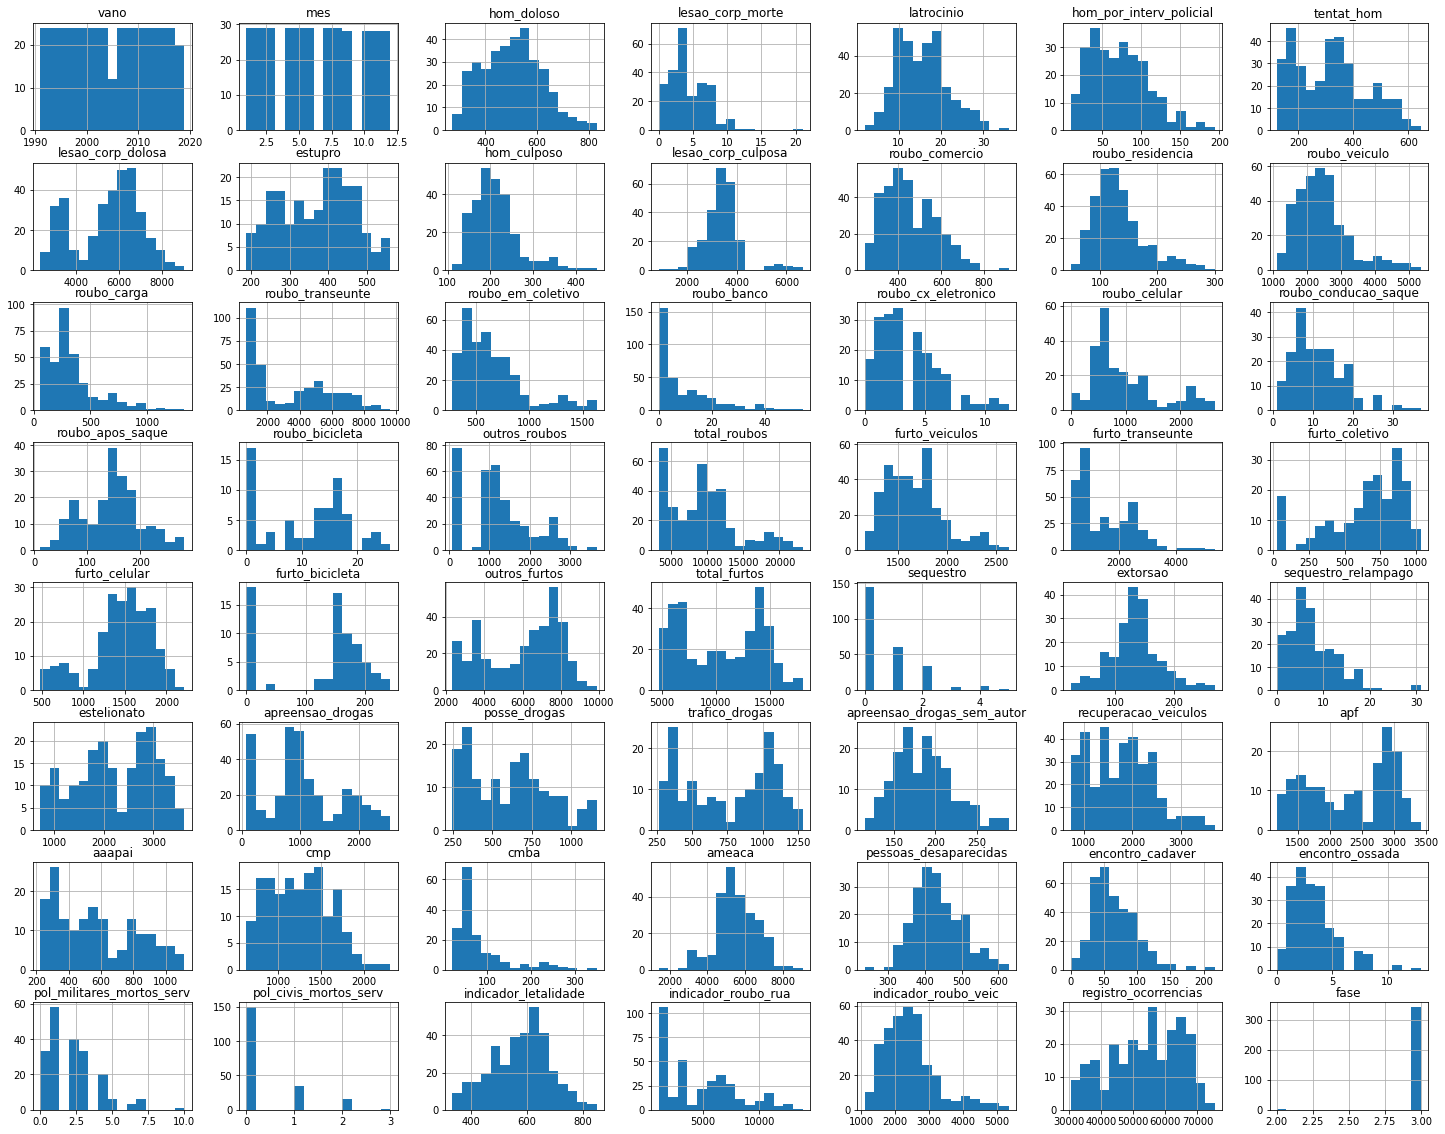

In [ ]:
df.hist(bins=15, figsize=(25,20))
plt.show()

Crimes contra o Patrimonio - Veiculos

In [ ]:
#verificando a media de roubo de veiculos
media_roubos = df.roubo_veiculo.mean()
print("Media de roubo de veiculos:", round(media_roubos,2))


Media de roubo de veiculos: 2448.7


In [ ]:
#verificando a media de furto de veiculos
media_furtos = df.furto_veiculos.mean()
print("Media do furto de veiculos:",round(media_furtos,2))

Media do furto de veiculos: 1674.67


In [ ]:
#verificando a media dos veiculos recuperados
media_recuperacao = df.recuperacao_veiculos.mean()
print("Media dos veiculos recuperados:",round(media_recuperacao,2))

Media dos veiculos recuperados: 1772.24


In [ ]:
#Total dos veiculos perdidos
total = media_roubos + media_furtos

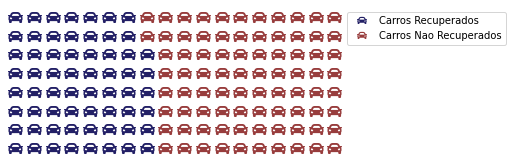

Porcentagem de carros recuperados:42.98%


In [ ]:
#Percentual de veiculos recuperados
percentual_recuperacao = media_recuperacao / total * 100

fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=18,
    colors=("#232066", "#983D3D"),
    values=[percentual_recuperacao,100-percentual_recuperacao], icons='car', icon_size=15,
    icon_legend=True,
    legend={
        'labels': ['Carros Recuperados','Carros Nao Recuperados'],
        'loc':'upper left',
        'bbox_to_anchor':(1,1)
    }
    
)
fig.set_tight_layout(False)
plt.show();
print("Porcentagem de carros recuperados:{:.2f}%".format(percentual_recuperacao))


Crimes Contra a Vida

In [ ]:
#maximo e minimo de homicidio doloso
maximo_hom_doloso = df.hom_doloso.max()
minimo_hom_doloso =df.hom_doloso.min()
print("Maximo de Homicidios dolosos:", maximo_hom_doloso)
print("Minimo de Homicidios dolosos:", minimo_hom_doloso)

Maximo de Homicidios dolosos: 831
Minimo de Homicidios dolosos: 272


In [ ]:
#verificando a data de maior ocorrencia de homicidios dolosos
df[df['hom_doloso']== 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [ ]:
#verificando a data de menor ocorrencia de homicidios dolosos
df[df['hom_doloso']== 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3




Pode-se observar que foi no ano de 1995 que teve o maior registro de homicídios dolosos (831) e o ano de 2015 teve o menor registro (272). É possível levantar uma hipótese de que a quantidade de homicídios dolosos caiu com o tempo, o que é um bom sinal. Para isso, irei utilizar de técnicas de visualização de dados para explorar como essa e outras variáveis se comportam ao longo do tempo


Visualizacao de Dados

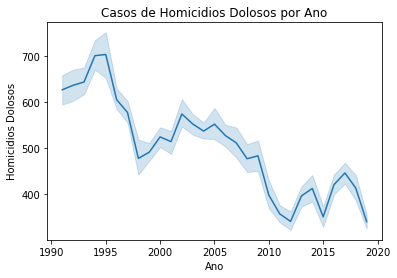

In [ ]:
#verificando os casos de homicidios dolosos ao longo do tempo 
sns.lineplot(data=df, x="vano", y="hom_doloso")

plt.title("Casos de Homicidios Dolosos por Ano")
plt.ylabel("Homicidios Dolosos")
plt.xlabel("Ano")
plt.show()

<function matplotlib.pyplot.show>

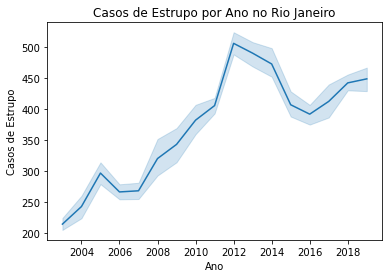

In [ ]:
sns.lineplot(data=df, x="vano",y="estupro")

plt.title("Casos de Estrupo por Ano no Rio Janeiro")
plt.ylabel("Casos de Estrupo")
plt.xlabel("Ano")
plt.show

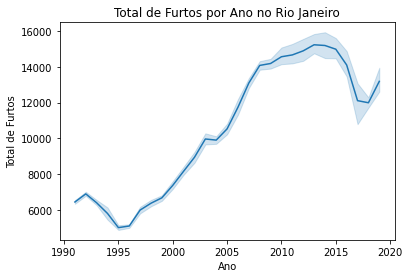

In [ ]:
sns.lineplot(data=df, x="vano",y="total_furtos")
plt.title("Total de Furtos por Ano no Rio Janeiro")
plt.ylabel("Total de Furtos")
plt.xlabel("Ano")
plt.show()

In [ ]:
pessoas_desaparecidas =df[df['vano']>= 2010].pessoas_desaparecidas.sum()
print("Pessoas desaparecidas na ultima decada:", pessoas_desaparecidas)

Pessoas desaparecidas na ultima decada: 53796.0


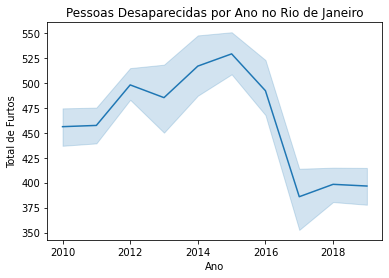

In [ ]:
sns.lineplot(data=df[df["vano"] >= 2010], x="vano", y="pessoas_desaparecidas")

plt.title("Pessoas Desaparecidas por Ano no Rio de Janeiro")
plt.ylabel("Total de Furtos")
plt.xlabel("Ano")
plt.show()

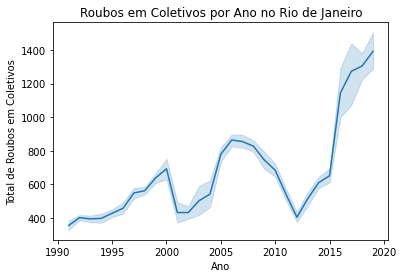

In [ ]:
sns.lineplot(data=df, x="vano",y="roubo_em_coletivo")
plt.title("Roubos em Coletivos por Ano no Rio de Janeiro")
plt.ylabel("Total de Roubos em Coletivos")
plt.xlabel("Ano")
plt.show()

Verificando os crimes mais frequentes por categoria

In [ ]:
#Adicionando uma linha com o total dos crimes 
df = df.append(df[df['vano'] >= 2000].sum(numeric_only=True), ignore_index=True)

In [ ]:
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
340,2019.0,5.0,345.0,2.0,15.0,172.0,478.0,4958.0,465.0,145.0,2304.0,514.0,93.0,3649.0,710.0,7332.0,1625.0,1.0,3.0,2427.0,9.0,87.0,7.0,2216.0,18673.0,1480.0,1475.0,715.0,1423.0,220.0,7711.0,13024.0,0.0,147.0,7.0,3498.0,2034.0,735.0,1133.0,199.0,2450.0,3169.0,527.0,1771.0,248.0,5068.0,390.0,20.0,1.0,0.0,0.0,534.0,11384.0,3649.0,68336.0,3.0
341,2019.0,6.0,332.0,3.0,8.0,153.0,436.0,4769.0,414.0,152.0,2481.0,382.0,85.0,3115.0,599.0,6077.0,1287.0,1.0,4.0,2187.0,19.0,83.0,9.0,1984.0,15832.0,1251.0,1443.0,630.0,1345.0,189.0,7224.0,12082.0,0.0,133.0,6.0,3029.0,1854.0,763.0,976.0,158.0,2041.0,2848.0,467.0,1585.0,233.0,4497.0,403.0,20.0,1.0,3.0,0.0,496.0,9551.0,3115.0,61202.0,3.0
342,2019.0,7.0,309.0,5.0,10.0,194.0,399.0,4740.0,402.0,140.0,2334.0,386.0,72.0,3198.0,691.0,6637.0,1208.0,1.0,0.0,2226.0,12.0,97.0,16.0,2110.0,16654.0,1353.0,1570.0,746.0,1391.0,230.0,7632.0,12922.0,0.0,135.0,12.0,3627.0,1861.0,709.0,996.0,187.0,2355.0,2907.0,490.0,1856.0,267.0,4678.0,400.0,32.0,7.0,0.0,0.0,518.0,10071.0,3198.0,65817.0,2.0
343,2019.0,8.0,318.0,1.0,6.0,170.0,457.0,4760.0,460.0,156.0,2437.0,433.0,103.0,3181.0,587.0,6452.0,1215.0,1.0,1.0,2245.0,9.0,98.0,17.0,1794.0,16136.0,1361.0,1568.0,674.0,1534.0,185.0,7280.0,12602.0,0.0,132.0,12.0,3546.0,1862.0,668.0,1067.0,171.0,2081.0,3114.0,476.0,2028.0,265.0,4662.0,367.0,27.0,8.0,2.0,0.0,495.0,9912.0,3181.0,65285.0,2.0
344,474204.0,1518.0,108052.0,970.0,3651.0,18050.0,90589.0,1496914.0,73989.0,47070.0,807298.0,116806.0,29489.0,636334.0,100187.0,1071979.0,176587.0,963.0,710.0,226082.0,2264.0,29133.0,735.0,363981.0,2755250.0,365641.0,449855.0,130046.0,289835.0,8487.0,1689878.0,2933742.0,165.0,26653.0,1551.0,446372.0,322348.0,99915.0,124500.0,30528.0,493490.0,380412.0,93255.0,205904.0,13619.0,1333183.0,92248.0,14694.0,700.0,417.0,68.0,130723.0,1474648.0,636334.0,12944113.0,706.0


Crimes Contra a Vida Mais Frequentes na Cidade do Rio de Janeiro

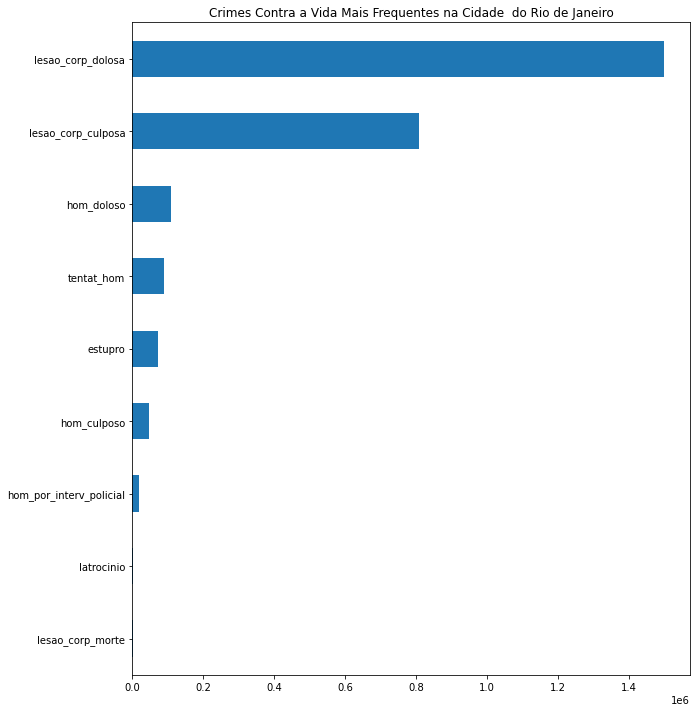

Confira os valores:


lesao_corp_dolosa          1496914.0
lesao_corp_culposa          807298.0
hom_doloso                  108052.0
tentat_hom                   90589.0
estupro                      73989.0
hom_culposo                  47070.0
hom_por_interv_policial      18050.0
latrocinio                    3651.0
lesao_corp_morte               970.0
Name: 344, dtype: float64

In [ ]:
df.iloc[344, 2:11].sort_values(ascending=True).plot.barh(figsize=(10,12))
plt.title("Crimes Contra a Vida Mais Frequentes na Cidade  do Rio de Janeiro")
plt.show()
print("Confira os valores:")
df.iloc[344, 2:11].sort_values(ascending=False)

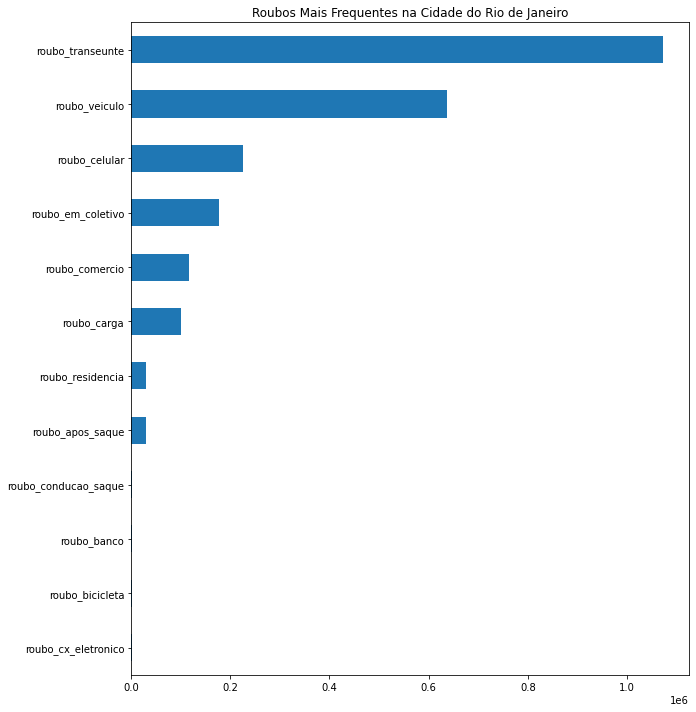

Confira os valores:


roubo_transeunte        1071979.0
roubo_veiculo            636334.0
roubo_celular            226082.0
roubo_em_coletivo        176587.0
roubo_comercio           116806.0
roubo_carga              100187.0
roubo_residencia          29489.0
roubo_apos_saque          29133.0
roubo_conducao_saque       2264.0
roubo_banco                 963.0
roubo_bicicleta             735.0
roubo_cx_eletronico         710.0
Name: 344, dtype: float64

In [ ]:
#Tipos de roubos mais frequentes na cidade do Rio de Janeiro
df.iloc[344, 11:23].sort_values(ascending=True).plot.barh(figsize=(10,12))
plt.title("Roubos Mais Frequentes na Cidade do Rio de Janeiro")
plt.show()

print("Confira os valores:")
df.iloc[344, 11:23].sort_values(ascending=False)


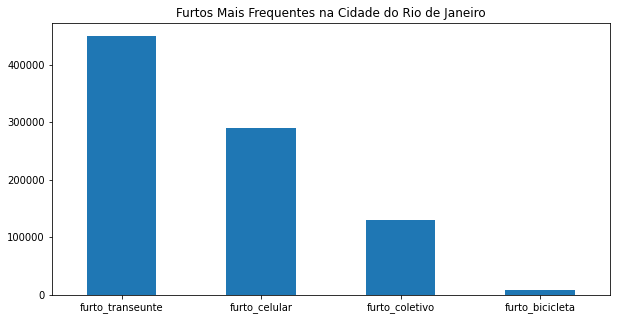

Confira os valores:


furto_transeunte    449855.0
furto_celular       289835.0
furto_coletivo      130046.0
furto_bicicleta       8487.0
Name: 344, dtype: float64

In [ ]:
df.iloc[344, 26:30].sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.title("Furtos Mais Frequentes na Cidade do Rio de Janeiro")
plt.xticks(rotation=0)
plt.show()

print("Confira os valores:")
df.iloc[344, 26:30].sort_values(ascending=False)